In [28]:
# Define a custom F1 score metric function
def f1_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))
    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1 = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())
    return f1

In [29]:
# Define a function to create and train the model
import tensorflow as tf
def create_model(num_neurons, num_layers, activation_fn, input_shape = X_train.shape[1]):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(input_shape,)))
    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(num_neurons, activation=activation_fn))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=f1_score)
    return model

Breast Cancer

In [25]:
file_path = "/content/breast-cancer.csv"

In [31]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()
# Import necessary modules for data preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# X contains the features (all columns except the 'diagnosis' and the "id" column)
X = df.drop(["diagnosis","id"], axis=1)
# y contains the labels (only the 'diagnosis' column)
y = df["diagnosis"]

# Split the dataset into training and testing sets
# random_state=0 ensures reproducibility of the results
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Initialize StandardScaler for feature scaling
scalar = StandardScaler()

# Fit the StandardScaler to the training data
scalar.fit(X_train)

# Transform the training and testing data using the fitted StandardScaler
# This scales each feature to have a mean of 0 and a standard deviation of 1
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

y_train = y_train.reset_index().drop("index", axis = 1).diagnosis.apply(lambda x: 1 if x == "M" else 0).values
y_test = y_test.reset_index().drop("index", axis = 1).diagnosis.apply(lambda x: 1 if x == "M" else 0).values

In [34]:
# Define grid parameters
neurons_list = [8, 16, 32, 64, 128, 256, 512]

params = []
f1s = []

for neurons in neurons_list:
    print(f"Testing with neurons: {neurons}")

    # Create and train the model
    model = create_model(neurons, 2, tf.nn.relu)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, f1_train = model.evaluate(X_train, y_train, verbose=0)
    _, f1_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"F1_score: {f1_test}")

    params.append(neurons)
    f1s.append([f1_train, f1_test])

Testing with neurons: 8
F1_score: 0.9133268594741821
Testing with neurons: 16
F1_score: 0.9101138114929199
Testing with neurons: 32
F1_score: 0.9243995547294617
Testing with neurons: 64
F1_score: 0.9243995547294617
Testing with neurons: 128
F1_score: 0.9307487607002258
Testing with neurons: 256
F1_score: 0.9508657455444336
Testing with neurons: 512
F1_score: 0.9295129776000977


Text(0.5, 0, 'num_neurons')

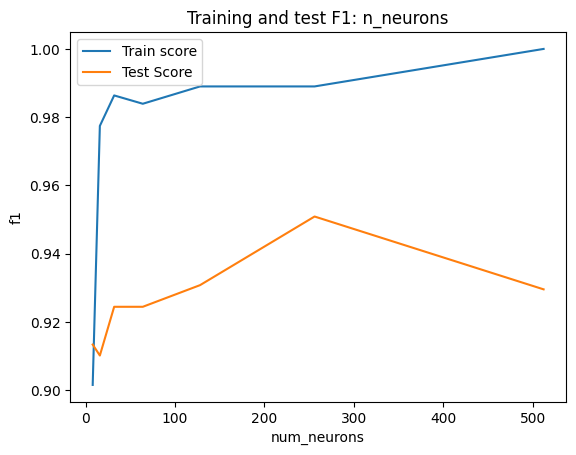

In [35]:
import matplotlib.pyplot as plt
plt.plot(params, f1s)
plt.legend(["Train score", "Test Score"])
plt.title('Training and test F1: n_neurons')
plt.ylabel('f1')
plt.xlabel('num_neurons')

In [36]:
layers_list = [1, 5, 10, 20]
params_l = []
f1s_l = []
for layers in layers_list:
    print(f"Testing with layers: {layers}")

    # Create and train the model
    model = create_model(128, layers, tf.nn.relu)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, f1_train = model.evaluate(X_train, y_train, verbose=0)
    _, f1_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"F1_score: {f1_test}")

    params_l.append(layers)
    f1s_l.append([f1_train, f1_test])

Testing with layers: 1
F1_score: 0.9233102798461914
Testing with layers: 5
F1_score: 0.9594078063964844
Testing with layers: 10
F1_score: 0.9154443740844727
Testing with layers: 20
F1_score: 0.9142144918441772


Text(0.5, 0, 'layers')

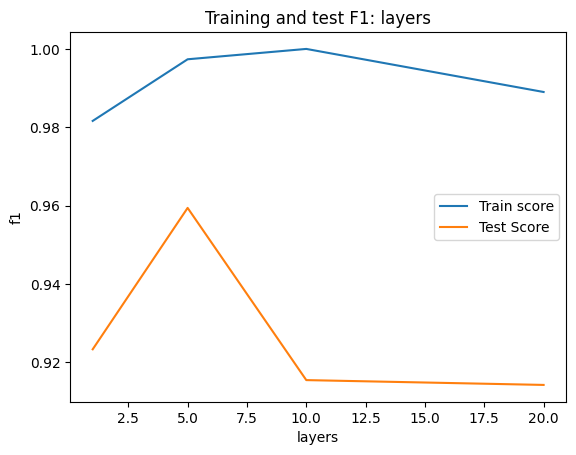

In [37]:
import matplotlib.pyplot as plt
plt.plot(params_l, f1s_l)
plt.legend(["Train score", "Test Score"])
plt.title('Training and test F1: layers')
plt.ylabel('f1')
plt.xlabel('layers')

In [42]:
activation_functions = [tf.nn.relu, tf.nn.tanh]
params_a = []
f1s_a = []

for activation in activation_functions:
    print(f"Testing with function: {activation}")

    # Create and train the model
    model = create_model(128, 10, activation)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, f1_train = model.evaluate(X_train, y_train, verbose=0)
    _, f1_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"F1_score: {f1_test}")

    params_a.append(activation)
    f1s_a.append([f1_train, f1_test])

Testing with function: <function relu at 0x7bd88555ef80>
F1_score: 0.9060534238815308
Testing with function: <function tanh at 0x7bd837fe7520>
F1_score: 0.9204546213150024


Text(0.5, 0, 'activation function')

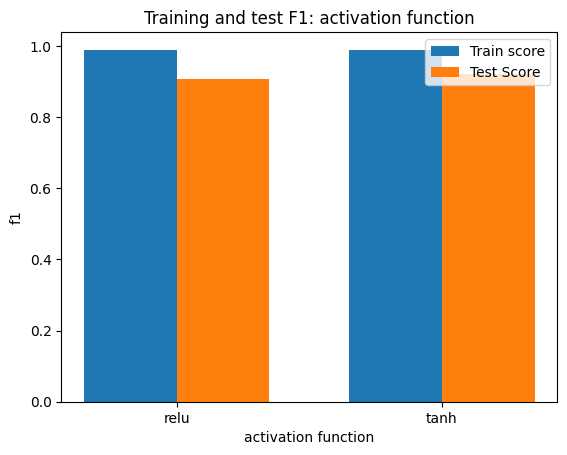

In [43]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(f1s_a))


plt.bar(x - bar_width/2, [f1[0] for f1 in f1s_a], bar_width,)
plt.bar(x + bar_width/2, [f1[1] for f1 in f1s_a], bar_width)
plt.xticks(x, [activation_fn.__name__ for activation_fn in params_a])
plt.legend(["Train score", "Test Score"])
plt.title('Training and test F1: activation function')
plt.ylabel('f1')
plt.xlabel('activation function')

Grid search

In [45]:
import tensorflow as tf
from itertools import product

# Perform grid search
best_f1 = 0
best_params = None

params_all = []
score_all = []

for neurons, layers, activation_fn in product(neurons_list, layers_list, activation_functions):
    print(f"Testing with neurons: {neurons}, layers: {layers}, activation: {activation_fn.__name__}")
    params = [neurons, layers, activation_fn]
    f1s = []
    for i in range(3):
      # Create and train the model
      model = create_model(neurons, layers, activation_fn)
      model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

      # Evaluate the model
      _, f1 = model.evaluate(X_test, y_test, verbose=0)
      print(f"F1_score: {f1}")

      # Check if this model is the best so far
      if f1 > best_f1:
          best_f1 = f1
          best_params = (neurons, layers, activation_fn)
      f1s.append(f1)
    params_all.append(params)
    score_all.append(f1s)
print("Grid search completed.")
print("Best parameters found - Neurons: {}, Layers: {}, Activation: {}, Accuracy: {}".format(*best_params, best_f1))

Testing with neurons: 8, layers: 1, activation: relu
F1_score: 0.8750478625297546
F1_score: 0.8594955205917358
F1_score: 0.8699420690536499
Testing with neurons: 8, layers: 1, activation: tanh
F1_score: 0.9070369601249695
F1_score: 0.864142119884491
F1_score: 0.9074807167053223
Testing with neurons: 8, layers: 5, activation: relu
F1_score: 0.9423097372055054
F1_score: 0.9081428647041321
F1_score: 0.8866276741027832
Testing with neurons: 8, layers: 5, activation: tanh
F1_score: 0.9284240007400513
F1_score: 0.9312812685966492
F1_score: 0.8995248079299927
Testing with neurons: 8, layers: 10, activation: relu
F1_score: 0.8785498738288879
F1_score: 0.855976939201355
F1_score: 0.9296489953994751
Testing with neurons: 8, layers: 10, activation: tanh
F1_score: 0.9039480090141296
F1_score: 0.9185484051704407
F1_score: 0.9286630749702454
Testing with neurons: 8, layers: 20, activation: relu
F1_score: 0.9189417958259583
F1_score: 0.8987270593643188
F1_score: 0.9375959634780884
Testing with neuron

In [46]:
score_all

[[0.8750478625297546, 0.8594955205917358, 0.8699420690536499],
 [0.9070369601249695, 0.864142119884491, 0.9074807167053223],
 [0.9423097372055054, 0.9081428647041321, 0.8866276741027832],
 [0.9284240007400513, 0.9312812685966492, 0.8995248079299927],
 [0.8785498738288879, 0.855976939201355, 0.9296489953994751],
 [0.9039480090141296, 0.9185484051704407, 0.9286630749702454],
 [0.9189417958259583, 0.8987270593643188, 0.9375959634780884],
 [0.903906524181366, 0.9404443502426147, 0.9066980481147766],
 [0.8913706541061401, 0.8953233957290649, 0.9154579043388367],
 [0.9049205780029297, 0.8786843419075012, 0.9162062406539917],
 [0.899539589881897, 0.9439840316772461, 0.8834919929504395],
 [0.9598526954650879, 0.9307487607002258, 0.9445165395736694],
 [0.9458047747612, 0.9170432090759277, 0.9017562866210938],
 [0.9582352638244629, 0.9335317611694336, 0.8948527574539185],
 [0.9335265159606934, 0.9310514330863953, 0.9445165395736694],
 [0.9543102979660034, 0.8889784812927246, 0.9231828451156616],

In [47]:
import pandas as pd
params_df = pd.DataFrame({"neurons": [i[0] for i in params_all],
                          "layers": [i[1] for i in params_all],
                          "activation": [i[2].__name__ for i in params_all]})

In [48]:
params_df["Scores"] = [np.mean(subarray) for subarray in score_all]

Finding optimal model

In [49]:
params_df[params_df["neurons"] != 512].sort_values(by = ["Scores"], ascending=False)

,neurons,layers,activation,Scores
20,32,10,relu,0.960075
44,256,10,relu,0.959057
38,128,20,relu,0.953667
45,256,10,tanh,0.953104
42,256,5,relu,0.947711
11,16,5,tanh,0.945039
27,64,5,tanh,0.943185
25,64,1,tanh,0.939977
33,128,1,tanh,0.939116
36,128,10,relu,0.937378


In [50]:
optimal_model = create_model(32, 10, tf.nn.relu)

In [51]:
import time
n_data_size = []
for i in np.arange(0.1, 1, 0.1):
    # Shuffle the data
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X = X_train[indices][:int(i * len(indices))]
    y = y_train[indices][:int(i * len(indices))]
    optimal_model = create_model(32, 10, tf.nn.relu)
    tic = time.time()
    history = optimal_model.fit(X, y, epochs=10, validation_data=(X_test, y_test), verbose=0)
    toc = time.time()
    n_data_size.append([toc - tic,
                         history.history['f1_score'][-1],
                         history.history['val_f1_score'][-1]])

Text(0.5, 0, 'Num of observations')

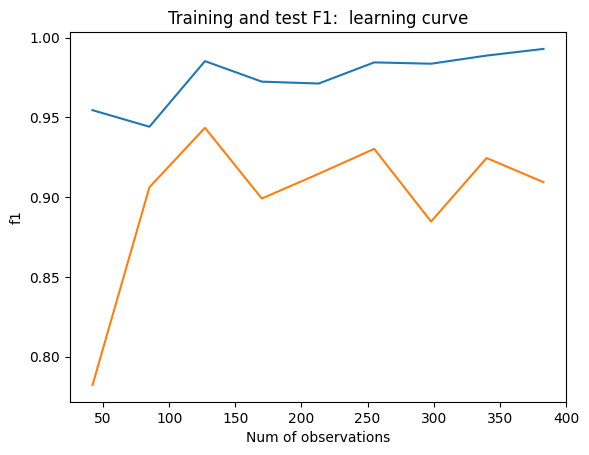

In [52]:
train_f1 = [i[1] for i in n_data_size]
test_f1 = [i[2] for i in n_data_size]
import matplotlib.pyplot as plt

plt.plot([int(i * len(indices)) for i in np.arange(0.1, 1, 0.1)], train_f1, label = "Train F1")
plt.plot([int(i * len(indices)) for i in np.arange(0.1, 1, 0.1)], test_f1, label = "Test F1")

plt.title('Training and test F1:  learning curve')
plt.ylabel('f1')
plt.xlabel('Num of observations')

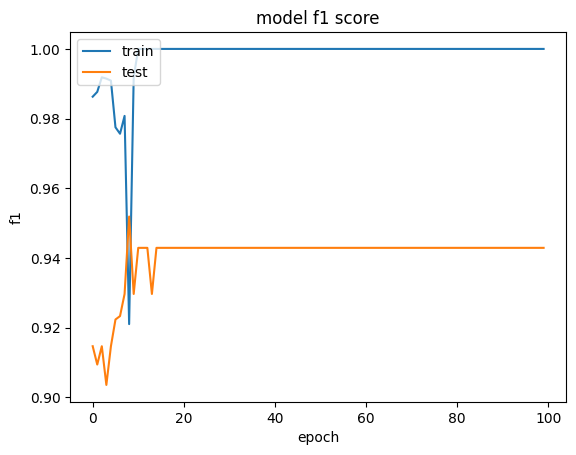

In [53]:
import time

history = optimal_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
# Summarize history for loss
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1 score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
import numpy as np
# Load the dataset
data_path = "/content/pneumoniamnist.npz"

npz_file = np.load(data_path)
print("Keys in the npz file:", npz_file.files)

Keys in the npz file: ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [4]:
X_train = np.load(data_path)['train_images']
X_test = np.load(data_path)['test_images']
y_train = np.load(data_path)["train_labels"].reshape(-1)
y_test = np.load(data_path)["test_labels"].reshape(-1)

In [5]:
from sklearn.decomposition import PCA
# PCA such that .95 percent of the variance is retained
pca = PCA(.95)
len_image_vector = X_train.shape[2] * X_train.shape[1]
pca.fit(X_train.reshape((X_train.shape[0],len_image_vector )))
X_train = pca.transform(X_train.reshape((X_train.shape[0],len_image_vector )))
X_test = pca.transform(X_test.reshape((X_test.shape[0],len_image_vector )))
print("The number of components for 95% varinace is ",pca.n_components_)

The number of components for 95% varinace is  71


### Plotting training and testing accuracies for bias and variance / overfit and underfit analysis



In [20]:
# Define grid parameters
neurons_list = [8, 16, 32, 64, 128, 256, 512, 1024]

params = []
f1s = []

for neurons in neurons_list:
    print(f"Testing with neurons: {neurons}")

    # Create and train the model
    model = create_model(neurons, 2, tf.nn.relu)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, f1_train = model.evaluate(X_train, y_train, verbose=0)
    _, f1_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"F1_score: {f1_test}")

    params.append(neurons)
    f1s.append([f1_train, f1_test])

Testing with neurons: 8
F1_score: 0.8817733526229858
Testing with neurons: 16
F1_score: 0.8807743787765503
Testing with neurons: 32
F1_score: 0.8863404989242554
Testing with neurons: 64
F1_score: 0.8832241892814636
Testing with neurons: 128
F1_score: 0.9055461883544922
Testing with neurons: 256
F1_score: 0.8825221061706543
Testing with neurons: 512
F1_score: 0.8933984637260437
Testing with neurons: 1024
F1_score: 0.8900195956230164


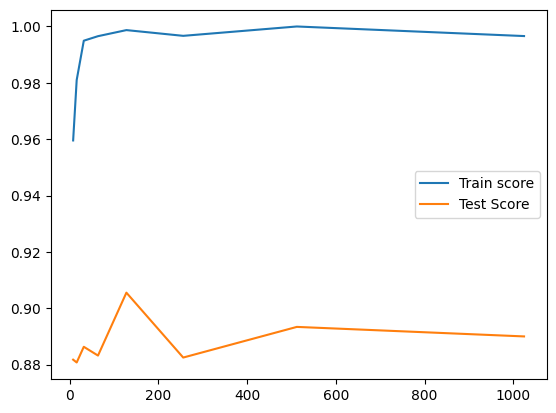

In [25]:
import matplotlib.pyplot as plt
plt.plot(params, f1s)
plt.legend(["Train score", "Test Score"])
plt.title('Training and test F1: n_neurons')
plt.ylabel('f1')
plt.xlabel('num_neurons')

In [30]:
layers_list = [1, 5, 10, 20, 50]
params_l = []
f1s_l = []
for layers in layers_list:
    print(f"Testing with layers: {layers}")

    # Create and train the model
    model = create_model(128, layers, tf.nn.relu)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, f1_train = model.evaluate(X_train, y_train, verbose=0)
    _, f1_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"F1_score: {f1_test}")

    params_l.append(layers)
    f1s_l.append([f1_train, f1_test])

Testing with layers: 1
F1_score: 0.88299959897995
Testing with layers: 5
F1_score: 0.8853424191474915
Testing with layers: 10
F1_score: 0.8790879249572754
Testing with layers: 20
F1_score: 0.8915087580680847
Testing with layers: 50
F1_score: 0.9035550951957703


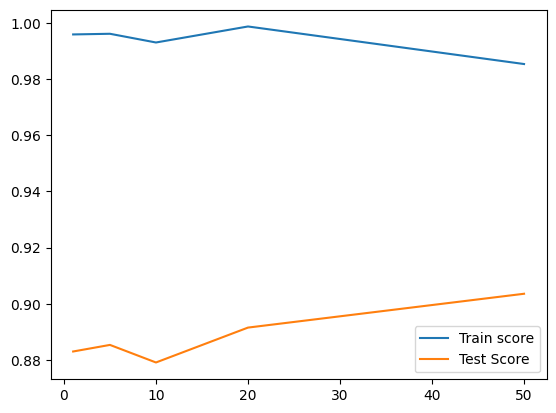

In [31]:
import matplotlib.pyplot as plt
plt.plot(params_l, f1s_l)
plt.legend(["Train score", "Test Score"])

In [35]:
activation_functions = [tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh]
params_a = []
f1s_a = []

for activation in activation_functions:
    print(f"Testing with function: {activation}")

    # Create and train the model
    model = create_model(128, 10, activation)
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

    # Evaluate the model
    _, f1_train = model.evaluate(X_train, y_train, verbose=0)
    _, f1_test = model.evaluate(X_test, y_test, verbose=0)
    print(f"F1_score: {f1_test}")

    params_a.append(activation)
    f1s_a.append([f1_train, f1_test])

Testing with function: <function relu at 0x7e692941ae60>
F1_score: 0.9096381068229675
Testing with function: <function sigmoid at 0x7e68dbbf2440>
F1_score: 0.8830922842025757
Testing with function: <function tanh at 0x7e68dbbf37f0>
F1_score: 0.8759373426437378


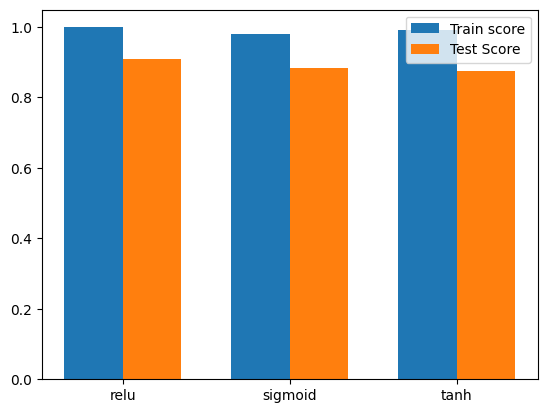

In [46]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
x = np.arange(len(f1s_a))


plt.bar(x - bar_width/2, [f1[0] for f1 in f1s_a], bar_width,)
plt.bar(x + bar_width/2, [f1[1] for f1 in f1s_a], bar_width)
plt.xticks(x, [activation_fn.__name__ for activation_fn in params_a])
plt.legend(["Train score", "Test Score"])

In [47]:
import tensorflow as tf
from itertools import product

# Perform grid search
best_f1 = 0
best_params = None

params_all = []
score_all = []

for neurons, layers, activation_fn in product(neurons_list, layers_list, activation_functions):
    print(f"Testing with neurons: {neurons}, layers: {layers}, activation: {activation_fn.__name__}")
    params = [neurons, layers, activation_fn]
    f1s = []
    for i in range(3):
      # Create and train the model
      model = create_model(neurons, layers, activation_fn)
      model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

      # Evaluate the model
      _, f1 = model.evaluate(X_test, y_test, verbose=0)
      print(f"F1_score: {f1}")

      # Check if this model is the best so far
      if f1 > best_f1:
          best_f1 = f1
          best_params = (neurons, layers, activation_fn)
    params_all.append(params)
    score_all.append(f1s)
print("Grid search completed.")
print("Best parameters found - Neurons: {}, Layers: {}, Activation: {}, Accuracy: {}".format(*best_params, best_f1))

Testing with neurons: 8, layers: 1, activation: relu
F1_score: 0.8628572225570679
F1_score: 0.875866711139679
F1_score: 0.8616397976875305
Testing with neurons: 8, layers: 1, activation: sigmoid
F1_score: 0.8645014762878418
F1_score: 0.8712604641914368
F1_score: 0.8780930638313293
Testing with neurons: 8, layers: 1, activation: tanh
F1_score: 0.858912467956543
F1_score: 0.8692569732666016
F1_score: 0.8700714111328125
Testing with neurons: 8, layers: 5, activation: relu
F1_score: 0.8689242601394653
F1_score: 0.8769103288650513
F1_score: 0.8767441511154175
Testing with neurons: 8, layers: 5, activation: sigmoid
F1_score: 0.8760398030281067
F1_score: 0.8943641781806946
F1_score: 0.8825998306274414
Testing with neurons: 8, layers: 5, activation: tanh
F1_score: 0.8442367315292358
F1_score: 0.8124114274978638
F1_score: 0.854836106300354
Testing with neurons: 8, layers: 10, activation: relu
F1_score: 0.8774394989013672
F1_score: 0.8712098002433777
F1_score: 0.8818802833557129
Testing with neu

KeyboardInterrupt: 

In [51]:
import pandas as pd
params_df = pd.DataFrame({"neurons": [i[0] for i in params_all],
                          "layers": [i[1] for i in params_all],
                          "activation": [i[2].__name__ for i in params_all]})

In [52]:
params_df

,neurons,layers,activation
0,8,1,relu
1,8,1,sigmoid
2,8,1,tanh
3,8,5,relu
4,8,5,sigmoid
...,...,...,...
97,512,10,sigmoid
98,512,10,tanh
99,512,20,relu
100,512,20,sigmoid


In [71]:
params_df["Scores"] = [np.mean(subarray) for subarray in scores_all]

In [79]:
params_df.sort_values(by = ["Scores"], ascending=False)

,neurons,layers,activation,Scores
96,512,10,relu,0.901807
92,512,1,tanh,0.898611
81,256,10,relu,0.898527
54,64,20,relu,0.897884
93,512,5,relu,0.897815
...,...,...,...,...
70,128,20,sigmoid,0.765194
43,32,50,sigmoid,0.765194
44,32,50,tanh,0.765194
55,64,20,sigmoid,0.765194


In [86]:
params_df[params_df["neurons"] != 512].sort_values(by = ["Scores"], ascending=False)

,neurons,layers,activation,Scores
81,256,10,relu,0.898527
54,64,20,relu,0.897884
66,128,10,relu,0.894867
76,256,1,sigmoid,0.893718
78,256,5,relu,0.893636
...,...,...,...,...
40,32,20,sigmoid,0.765194
43,32,50,sigmoid,0.765194
59,64,50,tanh,0.765194
58,64,50,sigmoid,0.765194


In [10]:

optimal_model = create_model(256, 10, tf.nn.relu)

In [88]:
history = optimal_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

In [89]:
history.history

{'loss': [0.2369932383298874,
  0.11622858047485352,
  0.06983284652233124,
  0.07605062425136566,
  0.053102362900972366,
  0.034856099635362625,
  0.03704933449625969,
  0.024578163400292397,
  0.030681094154715538,
  0.03804222121834755],
 'f1_score': [0.9475186467170715,
  0.9732565879821777,
  0.984000027179718,
  0.9829673767089844,
  0.9890645146369934,
  0.9913838505744934,
  0.9922654628753662,
  0.9940659999847412,
  0.9869756698608398,
  0.9924185276031494],
 'val_loss': [0.45082929730415344,
  0.6892634630203247,
  0.9046368598937988,
  1.0248557329177856,
  0.9038081169128418,
  0.9393026828765869,
  1.190266728401184,
  1.9236639738082886,
  1.6684921979904175,
  0.850102424621582],
 'val_f1_score': [0.9087689518928528,
  0.8942773938179016,
  0.877505898475647,
  0.8807822465896606,
  0.8791519403457642,
  0.8925915956497192,
  0.8989027738571167,
  0.8678482174873352,
  0.8967402577400208,
  0.906558632850647]}

In [12]:
import time
n_data_size = []
for i in np.arange(0.1, 1, 0.1):
    # Shuffle the data
    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X = X_train[indices][:int(i * len(indices))]
    y = y_train[indices][:int(i * len(indices))]
    optimal_model = create_model(256, 10, tf.nn.relu)
    tic = time.time()
    history = optimal_model.fit(X, y, epochs=10, validation_data=(X_test, y_test), verbose=0)
    toc = time.time()
    n_data_size.append([toc - tic,
                         history.history['f1_score'][-1],
                         history.history['val_f1_score'][-1]])


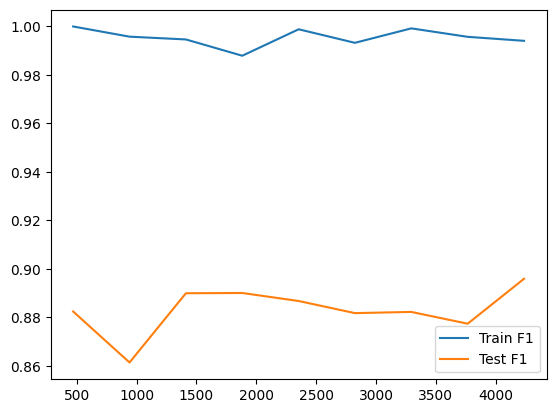

In [21]:
train_f1 = [i[1] for i in n_data_size]
test_f1 = [i[2] for i in n_data_size]
import matplotlib.pyplot as plt

plt.plot([int(i * len(indices)) for i in np.arange(0.1, 1, 0.1)], train_f1, label = "Train F1")
plt.plot([int(i * len(indices)) for i in np.arange(0.1, 1, 0.1)], test_f1, label = "Test F1")
plt.legend()
plt.show()

In [18]:
np.arange(0.1, 1, 0.1) * len(indices)

array([ 470.8,  941.6, 1412.4, 1883.2, 2354. , 2824.8, 3295.6, 3766.4,
       4237.2])

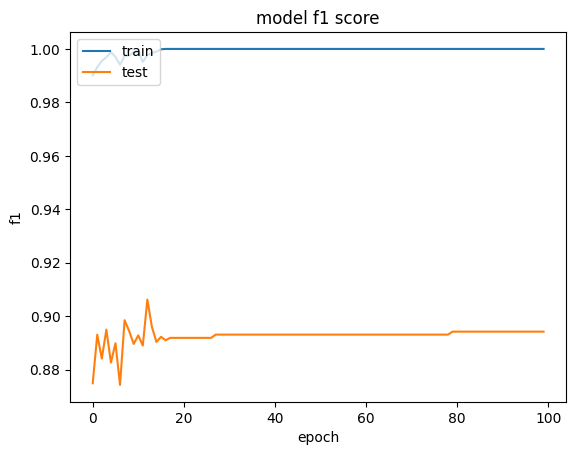

In [24]:
import time

history = optimal_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
# Summarize history for loss
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1 score')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()